In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np
import scipy.stats as st

### 生成200个以0为均值，1为标准差的正态分布的点

In [4]:
x = np.random.normal(0,1,200)
y = np.random.normal(0,1,200)

In [11]:
xy = np.load("./xy.npy")
x = xy[0]
y = xy[1]

np.save("./xy.npy",np.array([x,y]))
xy = np.load("./xy.npy")

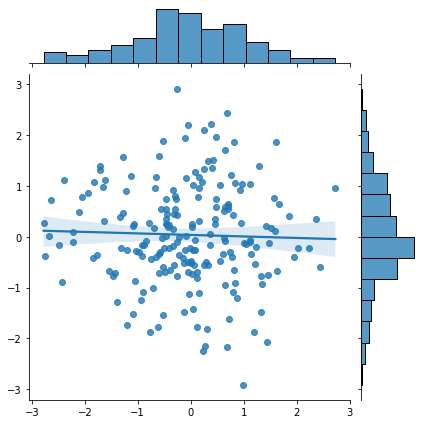

In [12]:
sns.JointGrid(x=x,y=y).plot(sns.regplot, sns.histplot)

<AxesSubplot:>

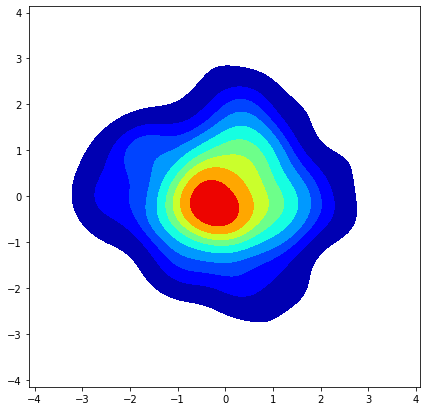

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
sns.kdeplot(x=x,y=y,cmap=plt.cm.jet,shade=True)

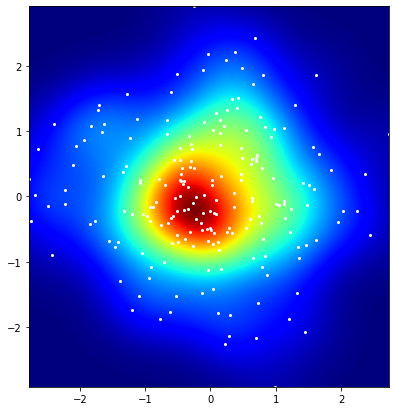

In [14]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(np.rot90(Z), cmap=plt.cm.jet,
           extent=[xmin, xmax, ymin, ymax])
ax.plot(x, y, 'w.', markersize=4)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [15]:
import rasterio

In [16]:
img = "./out.tif"

In [20]:
dataset = rasterio.open(
	img,
	'w',
	driver='GTiff',# 图像类型
	height=np.rot90(Z).shape[0],
	width=np.rot90(Z).shape[1],
	count=1,# 总层数
	dtype=np.float64,# 数据类型
	crs=rasterio.crs.CRS({'init': 'epsg:4326'})) 
dataset.write(np.rot90(Z),1)
dataset.close()